In [1]:
#Example: https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
# Load dataset
#df_bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
#df_bank = pd.read_csv('data/bank.csv')
df_bank = pd.read_csv('data/blockchain-kinesis-data-stream-realtime.csv')

# Drop 'duration' column
#df_bank = df_bank.drop('duration', axis=1)
df_bank = df_bank.drop('currencyId', axis=1)
df_bank = df_bank.drop('userIdentity', axis=1)
df_bank = df_bank.drop('certifiedAuthorityTrusted', axis=1)
df_bank = df_bank.drop('userVerified', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()

Shape of dataframe: (199, 10)


,openingValue,closingValue,highestValue,lowestValue,adjClose,volumeStocks,userFollowers,userFriends,userCreditRating,tokenTrusted
0,8.038788e+06,6.837129e+06,7.104514e+06,3.402046e+06,4.098355e+06,523637,62420,2984,0.197385,True
1,4.846313e+06,8.550841e+06,7.972916e+05,6.705993e+06,2.427546e+06,927977,71644,7806,0.598625,False
2,2.459046e+06,8.161704e+05,6.731340e+06,6.433721e+06,4.251601e+06,865215,47629,3585,0.669577,False
3,1.259388e+06,9.960730e+06,7.876745e+05,4.898608e+06,1.959951e+06,980963,46426,1505,0.612687,False
4,6.742674e+06,5.187133e+06,6.272002e+06,2.206014e+06,1.233915e+06,935381,44806,8786,0.219620,False


In [3]:
df_bank['tokenTrusted'].value_counts()

False    104
True      95
Name: tokenTrusted, dtype: int64

In [4]:
df_bank.isnull().sum()

openingValue        0
closingValue        0
highestValue        0
lowestValue         0
adjClose            0
volumeStocks        0
userFollowers       0
userFriends         0
userCreditRating    0
tokenTrusted        0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df_bank.copy()

scaler = StandardScaler()
#	openingValue	closingValue	highestValue	lowestValue	adjClose	volumeStocks	userFollowers	userFriends	userCreditRating	tokenTrusted
num_cols = ['openingValue', 'closingValue', 'highestValue', 'highestValue', 'lowestValue', 'adjClose', 'volumeStocks', 'userFollowers', 'userFriends', 'userCreditRating', 'tokenTrusted']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank_ready.head()

,openingValue,closingValue,highestValue,lowestValue,adjClose,volumeStocks,userFollowers,userFriends,userCreditRating,tokenTrusted
0,1.033354,0.678357,0.725892,-0.605292,-0.287280,0.022698,0.420028,-0.735633,-1.006875,1.046297
1,-0.075130,1.286141,-1.552911,0.499927,-0.866744,1.400798,0.742971,0.967266,0.418450,-0.955752
2,-0.904033,-1.457032,0.591064,0.408848,-0.234132,1.186888,-0.097822,-0.523389,0.670492,-0.955752
3,-1.320576,1.786171,-1.556386,-0.104670,-1.028914,1.581389,-0.139941,-1.257945,0.468401,-0.955752
4,0.583320,0.093170,0.425105,-1.005383,-1.280715,1.426033,-0.196659,1.313355,-0.927890,-0.955752


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = df_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)
df_bank_ready.head()

Shape of dataframe: (11162, 51)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,1


In [7]:
# Select Features
feature = df_bank_ready.drop('deposit', axis=1)

# Select Target
target = df_bank_ready['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


In [8]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [9]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6336766681594268
Precision: 0.6215953307392996
Recall: 0.598314606741573
F1 Score: 0.6097328244274809
Cohens Kappa Score: 0.2648219403033133
Area Under Curve: 0.6322045136712157
Confusion Matrix:
 [[776 389]
 [429 639]]


In [10]:
#Reference from: https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
from sklearn import model_selection
from sklearn.ensemble.forest import RandomForestClassifier
X=feature
y=target
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_eval = evaluate_model(rfc, X_test, y_test)
# predictions
rfc_predict = rfc.predict(X_test)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[942 223]
 [394 674]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1165
           1       0.75      0.63      0.69      1068

    accuracy                           0.72      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.72      0.72      2233



=== All AUC Scores ===
[0.27185165 0.41472969 0.66643373 0.53614869 0.82768104 0.86857978
 0.92488962 0.88646413 0.76880779 0.77502545]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6940611564910454


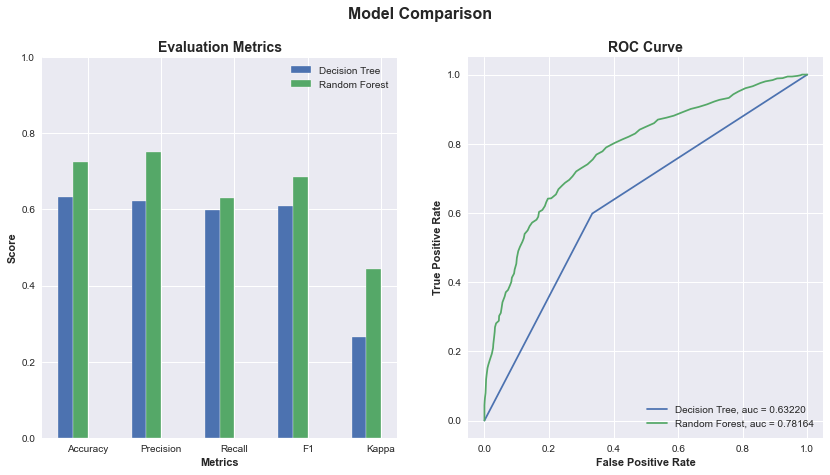

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


In [11]:
from faker import Faker
fake = Faker()

fake.name()

ModuleNotFoundError: No module named 'faker'